In [5]:
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt

In [6]:
# R로 Box-Cox Transformation 결과 람다는 2 나옴
df= pd.read_csv('happy_0814.csv', header=0)
# df['country']= df['country'].astype("category")
model = ols("np.square(HS)~  C(country)+ log_gdp + social+ life_exp + freedom+ generosity+ corruption+ schooling+ alcohol+ suicide+ obesity+ birth+ mental", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.square(HS)   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     125.3
Date:                Sun, 15 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:10:33   Log-Likelihood:                -5003.4
No. Observations:                1881   AIC:                         1.034e+04
Df Residuals:                    1716   BIC:                         1.125e+04
Df Model:                         164                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                -73.8005      8.353     -8.835      0.000     -90.184     -57.417
C(country)[T.Albania]                     -0.2323      2.648     -0.088      0.930      -5.426       4.961
C(country)[T.Algeria]                      3.6627      2.482      1.475      0.140      -1.206       8.531
C(country)[T.Angola]                     -14.1848      2.763     -5.134      0.000     -19.604      -8.766
C(country)[T.Argentina]                    2.1454      2.953      0.726      0.468      -3.647       7.938
C(country)[T.Armenia]                     -1.5153      2.855     -0.531      0.596      -7.114       4.084
C(country)[T.Australia]                    3.7333      4.041      0.924      0.356      -4.193      11.660
C(country)[T.Austria]                      2.9948      3.785      0.791      0.429      -4.429      10.419
C(country)[T.Azerbaijan]                  -2.3324      2.790     -0.836      0.403      -7.806       3.141
C(country)[T.Bahrain]                     -7.7592      3.830     -2.026      0.043     -15.271      -0.247
C(country)[T.Bangladesh]                   3.5253      2.420      1.456      0.145      -1.222       8.273
C(country)[T.Belarus]                      4.9756      4.170      1.193      0.233      -3.204      13.155
C(country)[T.Belgium]                     -0.8825      3.918     -0.225      0.822      -8.566       6.801
C(country)[T.Belize]                      14.9750      3.491      4.290      0.000       8.128      21.822
C(country)[T.Benin]                       -4.6452      1.737     -2.674      0.008      -8.053      -1.238
C(country)[T.Bhutan]                      -9.8863      3.433     -2.880      0.004     -16.619      -3.154
C(country)[T.Bolivia]                      5.8552      2.276      2.573      0.010       1.391      10.319
C(country)[T.Bosnia and Herzegovina]       2.3909      2.830      0.845      0.398      -3.160       7.942
C(country)[T.Botswana]                   -22.7712      2.973     -7.658      0.000     -28.603     -16.939
C(country)[T.Brazil]                      10.9534      2.736      4.003      0.000       5.587      16.320
C(country)[T.Bulgaria]                    -9.2491      3.271     -2.828      0.005     -15.664      -2.834
C(country)[T.Burkina Faso]                -3.1190      1.754     -1.778      0.076      -6.559       0.321
C(country)[T.Burundi]                      7.8382      2.293      3.418      0.001       3.341      12.336
C(country)[T.Cambodia]                    -4.8470      2.311     -2.097      0.036      -9.380      -0.314
C(country)[T.Cameroon]                    -2.2065      1.871     -1.179      0.238      -5.876       1.463
C(country)[T.Canada]                       5.7194      3.829      1.494      0.135     

In [7]:
ndf=df.sample(frac=1,random_state=4).reset_index(drop=True)
model2 = ols("np.square(HS)~  country+ log_gdp + social+ life_exp + freedom+ generosity+ corruption+ schooling+ alcohol+ suicide+ obesity+ birth+ mental", data=ndf).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.square(HS)   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     125.3
Date:                Sun, 15 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:10:37   Log-Likelihood:                -5003.4
No. Observations:                1881   AIC:                         1.034e+04
Df Residuals:                    1716   BIC:                         1.125e+04
Df Model:                         164                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                             -73.8005      8.353     -8.835      0.000     -90.184     -57.417
country[T.Albania]                     -0.2323      2.648     -0.088      0.930      -5.426       4.961
country[T.Algeria]                      3.6627      2.482      1.475      0.140      -1.206       8.531
country[T.Angola]                     -14.1848      2.763     -5.134      0.000     -19.604      -8.766
country[T.Argentina]                    2.1454      2.953      0.726      0.468      -3.647       7.938
country[T.Armenia]                     -1.5153      2.855     -0.531      0.596      -7.114       4.084
country[T.Australia]                    3.7333      4.041      0.924      0.356      -4.193      11.660
country[T.Austria]                      2.9948      3.785      0.791      0.429      -4.429      10.419
country[T.Azerbaijan]                  -2.3324      2.790     -0.836      0.403      -7.806       3.141
country[T.Bahrain]                     -7.7592      3.830     -2.026      0.043     -15.271      -0.247
country[T.Bangladesh]                   3.5253      2.420      1.456      0.145      -1.222       8.273
country[T.Belarus]                      4.9756      4.170      1.193      0.233      -3.204      13.155
country[T.Belgium]                     -0.8825      3.918     -0.225      0.822      -8.566       6.801
country[T.Belize]                      14.9750      3.491      4.290      0.000       8.128      21.822
country[T.Benin]                       -4.6452      1.737     -2.674      0.008      -8.053      -1.238
country[T.Bhutan]                      -9.8863      3.433     -2.880      0.004     -16.619      -3.154
country[T.Bolivia]                      5.8552      2.276      2.573      0.010       1.391      10.319
country[T.Bosnia and Herzegovina]       2.3909      2.830      0.845      0.398      -3.160       7.942
country[T.Botswana]                   -22.7712      2.973     -7.658      0.000     -28.603     -16.939
country[T.Brazil]                      10.9534      2.736      4.003      0.000       5.587      16.320
country[T.Bulgaria]                    -9.2491      3.271     -2.828      0.005     -15.664      -2.834
country[T.Burkina Faso]                -3.1190      1.754     -1.778      0.076      -6.559       0.321
country[T.Burundi]                      7.8382      2.293      3.418      0.001       3.341      12.336
country[T.Cambodia]                    -4.8470      2.311     -2.097      0.036      -9.380      -0.314
country[T.Cameroon]                    -2.2065      1.871     -1.179      0.238      -5.876       1.463
country[T.Canada]                       5.7194      3.829      1.494      0.135      -1.790      13.229
country[T.Central African Republic]     3.5628      2.243      1.58

In [8]:
from patsy import dmatrix, dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
y, X = dmatrices('np.square(HS)~ C(country)+ log_gdp + social+ life_exp + freedom+ generosity+ corruption+ schooling+ alcohol+ suicide+ obesity+ birth+ mental',ndf, return_type = 'dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,10006.811559,Intercept
1,6.900927,C(country)[T.Albania]
2,3.742389,C(country)[T.Algeria]
3,2.323179,C(country)[T.Angola]
4,9.894931,C(country)[T.Argentina]
...,...,...
160,47.405497,alcohol
161,46.980688,suicide
162,123.652020,obesity
163,92.893053,birth


# MinMaxScaler 사용
## -- MinMaxScaler은 feature 값이 0~1 사이
## -- 변환된 값이 매우 좁은 범위로 압축될 수 있음
## -- 아웃라이어의 존재에 매우 민감

In [9]:
# 싸이킷런 MinMaxScaler 으로 정규화
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler()
x= df[['log_gdp', 'social', 'life_exp', 'freedom','generosity', 'corruption', 
       'schooling', 'alcohol', 'suicide','obesity', 'birth', 'mental']]
scale = transformer.fit_transform(x)
scale
df_minmax= pd.DataFrame(scale)
df_minmax.columns = ['log_gdp', 'social', 'life_exp', 'freedom', 'generosity', 'corruption', 'schooling', 'alcohol',
                     'suicide','obesity', 'birth', 'mental']
# 정규화 안한 컬럼 df_minmax에 추가
df_minmax[['HS','year','country','continent']]= df[['HS','year','country','continent']]
df_minmax

,log_gdp,social,life_exp,freedom,generosity,corruption,schooling,alcohol,suicide,obesity,birth,mental,HS,year,country,continent
0,0.146619,0.230990,0.412946,0.632737,0.486931,0.893460,0.132812,0.023349,0.055732,0.196126,0.813552,0.134234,3.724,2008,Afghanistan,AS
1,0.180531,0.375897,0.421875,0.579092,0.508228,0.859705,0.140625,0.022616,0.058095,0.214689,0.784032,0.143845,4.402,2009,Afghanistan,AS
2,0.201875,0.357245,0.430804,0.470426,0.441433,0.708861,0.148438,0.022087,0.061509,0.229621,0.752983,0.155766,4.758,2010,Afghanistan,AS
3,0.196489,0.331420,0.437946,0.327373,0.481123,0.734177,0.156250,0.021458,0.064580,0.240517,0.721322,0.166215,3.832,2011,Afghanistan,AS
4,0.213445,0.331420,0.445089,0.375516,0.552759,0.781646,0.164062,0.020844,0.066509,0.248991,0.689507,0.174200,3.783,2012,Afghanistan,AS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,0.269100,0.685796,0.493304,0.653370,0.232333,0.726793,0.539062,0.029011,0.304615,0.148507,0.420618,0.144364,3.735,2016,Zimbabwe,AF
1877,0.275484,0.665710,0.506696,0.680880,0.229429,0.755274,0.539062,0.028272,0.316034,0.159403,0.405782,0.156060,3.638,2017,Zimbabwe,AF
1878,0.282067,0.695839,0.520089,0.694635,0.258470,0.853376,0.539062,0.028272,0.316034,0.159403,0.391710,0.156060,3.616,2018,Zimbabwe,AF
1879,0.262318,0.672884,0.533482,0.514443,0.262343,0.839662,0.539062,0.028272,0.316034,0.159403,0.378862,0.156060,2.694,2019,Zimbabwe,AF


In [10]:
df_minmax['country']= df_minmax['country'].astype("category")
model2 = ols("np.square(HS)~  country+ log_gdp + social+ life_exp + freedom+ generosity+ corruption+ schooling+ alcohol+ suicide+ obesity+ birth+ mental", data=df_minmax).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.square(HS)   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     125.3
Date:                Sun, 15 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:10:51   Log-Likelihood:                -5003.4
No. Observations:                1881   AIC:                         1.034e+04
Df Residuals:                    1716   BIC:                         1.125e+04
Df Model:                         164                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               3.8209      4.002      0.955      0.340      -4.029      11.671
country[T.Albania]                     -0.2323      2.648     -0.088      0.930      -5.426       4.961
country[T.Algeria]                      3.6627      2.482      1.475      0.140      -1.206       8.531
country[T.Angola]                     -14.1848      2.763     -5.134      0.000     -19.604      -8.766
country[T.Argentina]                    2.1454      2.953      0.726      0.468      -3.647       7.938
country[T.Armenia]                     -1.5153      2.855     -0.531      0.596      -7.114       4.084
country[T.Australia]                    3.7333      4.041      0.924      0.356      -4.193      11.660
country[T.Austria]                      2.9948      3.785      0.791      0.429      -4.429      10.419
country[T.Azerbaijan]                  -2.3324      2.790     -0.836      0.403      -7.806       3.141
country[T.Bahrain]                     -7.7592      3.830     -2.026      0.043     -15.271      -0.247
country[T.Bangladesh]                   3.5253      2.420      1.456      0.145      -1.222       8.273
country[T.Belarus]                      4.9756      4.170      1.193      0.233      -3.204      13.155
country[T.Belgium]                     -0.8825      3.918     -0.225      0.822      -8.566       6.801
country[T.Belize]                      14.9750      3.491      4.290      0.000       8.128      21.822
country[T.Benin]                       -4.6452      1.737     -2.674      0.008      -8.053      -1.238
country[T.Bhutan]                      -9.8863      3.433     -2.880      0.004     -16.619      -3.154
country[T.Bolivia]                      5.8552      2.276      2.573      0.010       1.391      10.319
country[T.Bosnia and Herzegovina]       2.3909      2.830      0.845      0.398      -3.160       7.942
country[T.Botswana]                   -22.7712      2.973     -7.658      0.000     -28.603     -16.939
country[T.Brazil]                      10.9534      2.736      4.003      0.000       5.587      16.320
country[T.Bulgaria]                    -9.2491      3.271     -2.828      0.005     -15.664      -2.834
country[T.Burkina Faso]                -3.1190      1.754     -1.778      0.076      -6.559       0.321
country[T.Burundi]                      7.8382      2.293      3.418      0.001       3.341      12.336
country[T.Cambodia]                    -4.8470      2.311     -2.097      0.036      -9.380      -0.314
country[T.Cameroon]                    -2.2065      1.871     -1.179      0.238      -5.876       1.463
country[T.Canada]                       5.7194      3.829      1.494      0.135      -1.790      13.229
country[T.Central African Republic]     3.5628      2.243      1.58

In [11]:
# 방식 1 -> vif 값이 높게 나옴
from patsy import dmatrix, dmatrices
y, X = dmatrices('np.square(HS)~ C(country)+ log_gdp + social+ life_exp + freedom+ generosity+ corruption+ schooling+ alcohol+ suicide+ obesity+ birth+ mental', df_minmax, return_type = 'dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,2297.072297,Intercept
1,6.900927,C(country)[T.Albania]
2,3.742389,C(country)[T.Algeria]
3,2.323179,C(country)[T.Angola]
4,9.894931,C(country)[T.Argentina]
...,...,...
160,47.405497,alcohol
161,46.980688,suicide
162,123.652020,obesity
163,92.893053,birth


In [12]:
# 방식 2 -> 오류뜸
# ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types 
# according to the casting rule ''safe''
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
df['country']= df['country'].astype("category")
x= df_minmax[['log_gdp', 'social', 'life_exp', 'freedom','generosity', 'corruption', 
       'schooling', 'alcohol', 'suicide','obesity', 'birth', 'mental','country']]

vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif.round(1)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

# StandardScaler 사용
## -- StandardScaler은 각  feature 마다 평균을 0, 분산을 1로 스케일링
## -- 하한값과 상한값이 컬럼마다 다름
## -- 알코올 컬럼같은 경우 range(-7, 6)

In [13]:
# 싸이킷런 StandardScaler으로 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x= df[['log_gdp', 'social', 'life_exp', 'freedom','generosity', 'corruption', 
       'schooling', 'alcohol', 'suicide','obesity', 'birth', 'mental']]
scale2 = scaler.fit_transform(x)
scale2
df_standard= pd.DataFrame(scale2)
df_standard.columns = ['log_gdp', 'social', 'life_exp', 'freedom', 'generosity', 'corruption', 'schooling', 'alcohol',
                     'suicide','obesity', 'birth', 'mental']
# 정규화 안한 컬럼 df_scaler에 추가
df_standard[['HS','year','country','continent']]= df[['HS','year','country','continent']]

In [14]:
df_standard['country']= df_standard['country'].astype("category")
model2 = ols("np.square(HS)~  country+ log_gdp + social+ life_exp + freedom+ generosity+ corruption+ schooling+ alcohol+ suicide+ obesity+ birth+ mental", data=df_standard).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.square(HS)   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     125.3
Date:                Sun, 15 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:11:05   Log-Likelihood:                -5003.4
No. Observations:                1881   AIC:                         1.034e+04
Df Residuals:                    1716   BIC:                         1.125e+04
Df Model:                         164                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              31.7548      2.322     13.678      0.000      27.201      36.308
country[T.Albania]                     -0.2323      2.648     -0.088      0.930      -5.426       4.961
country[T.Algeria]                      3.6627      2.482      1.475      0.140      -1.206       8.531
country[T.Angola]                     -14.1848      2.763     -5.134      0.000     -19.604      -8.766
country[T.Argentina]                    2.1454      2.953      0.726      0.468      -3.647       7.938
country[T.Armenia]                     -1.5153      2.855     -0.531      0.596      -7.114       4.084
country[T.Australia]                    3.7333      4.041      0.924      0.356      -4.193      11.660
country[T.Austria]                      2.9948      3.785      0.791      0.429      -4.429      10.419
country[T.Azerbaijan]                  -2.3324      2.790     -0.836      0.403      -7.806       3.141
country[T.Bahrain]                     -7.7592      3.830     -2.026      0.043     -15.271      -0.247
country[T.Bangladesh]                   3.5253      2.420      1.456      0.145      -1.222       8.273
country[T.Belarus]                      4.9756      4.170      1.193      0.233      -3.204      13.155
country[T.Belgium]                     -0.8825      3.918     -0.225      0.822      -8.566       6.801
country[T.Belize]                      14.9750      3.491      4.290      0.000       8.128      21.822
country[T.Benin]                       -4.6452      1.737     -2.674      0.008      -8.053      -1.238
country[T.Bhutan]                      -9.8863      3.433     -2.880      0.004     -16.619      -3.154
country[T.Bolivia]                      5.8552      2.276      2.573      0.010       1.391      10.319
country[T.Bosnia and Herzegovina]       2.3909      2.830      0.845      0.398      -3.160       7.942
country[T.Botswana]                   -22.7712      2.973     -7.658      0.000     -28.603     -16.939
country[T.Brazil]                      10.9534      2.736      4.003      0.000       5.587      16.320
country[T.Bulgaria]                    -9.2491      3.271     -2.828      0.005     -15.664      -2.834
country[T.Burkina Faso]                -3.1190      1.754     -1.778      0.076      -6.559       0.321
country[T.Burundi]                      7.8382      2.293      3.418      0.001       3.341      12.336
country[T.Cambodia]                    -4.8470      2.311     -2.097      0.036      -9.380      -0.314
country[T.Cameroon]                    -2.2065      1.871     -1.179      0.238      -5.876       1.463
country[T.Canada]                       5.7194      3.829      1.494      0.135      -1.790      13.229
country[T.Central African Republic]     3.5628      2.243      1.58

In [15]:
# 방식 1 -> vif 값이 높게 나옴
from patsy import dmatrix, dmatrices
y, X = dmatrices('np.square(HS)~ country+ log_gdp + social+ life_exp + freedom+ generosity+ corruption+ schooling+ alcohol+ suicide+ obesity+ birth+ mental', df_standard, return_type = 'dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,772.934299,Intercept
1,6.900927,country[T.Albania]
2,3.742389,country[T.Algeria]
3,2.323179,country[T.Angola]
4,9.894931,country[T.Argentina]
...,...,...
160,47.405497,alcohol
161,46.980688,suicide
162,123.652020,obesity
163,92.893053,birth


# 대안. 범주형 컬럼을 country 에서 continent로 바꾸기..

# 1. 모델 만들기

In [16]:
df= pd.read_csv('happy_0814.csv', header=0)
model = ols("HS~  continent+ log_gdp + social+ life_exp + freedom+ generosity+ corruption+ schooling+ alcohol+ suicide+ obesity+ birth+ mental", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HS   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     450.1
Date:                Sun, 15 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:11:14   Log-Likelihood:                -1352.7
No. Observations:                1881   AIC:                             2741.
Df Residuals:                    1863   BIC:                             2841.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -3.5448      0.355     -9.985      0.000      -4.241      -2.849
continent[T.AS]        0.1678      0.046      3.662      0.000       0.078       0.258
continent[T.EU]        0.3484      0.063      5.562      0.000       0.226       0.471
continent[T.Nor.A]     0.7699      0.061     12.532      0.000       0.649       0.890
continent[T.OC]        0.5149      0.114      4.500      0.000       0.290       0.739
continent[T.SA]        0.7178      0.061     11.751      0.000       0.598       0.838
log_gdp                0.5474      0.028     19.341      0.000       0.492       0.603
social                 1.6353      0.152     10.731      0.000       1.336       1.934
life_exp               0.0243      0.005      5.361      0.000       0.015       0.033
freedom                0.9182      0.109      8.428      0.000       0.705       1.132
generosity             0.5727      0.087      6.580      0.000       0.402       0.743
corruption            -0.4438      0.083     -5.370      0.000      -0.606      -0.282
schooling              0.0020      0.008      0.258      0.797      -0.013       0.017
alcohol                0.0187      0.004      4.536      0.000       0.011       0.027
suicide               -0.0681      0.020     -3.380      0.001      -0.108      -0.029
obesity               -0.0223      0.004     -6.083      0.000      -0.030      -0.015
birth                  0.1627      0.020      8.023      0.000       0.123       0.202
mental                 0.0354      0.013      2.786      0.005       0.010       0.060
==============================================================================
Omnibus:                       28.661   Durbin-Watson:                   0.657
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.925
Skew:                          -0.222   Prob(JB):                     2.61e-08
Kurtosis:                       3.499   Cond. No.                     2.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
# row 재배치, box-cox 실행시 1.36 나와서 람다 1로 두고 진행
ndf=df.sample(frac=1,random_state=4).reset_index(drop=True)
model2 = ols("HS~  continent+ log_gdp + social+ life_exp + freedom+ generosity+ corruption+ schooling+ alcohol+ suicide+ obesity+ birth+ mental", data=ndf).fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HS   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     450.1
Date:                Sun, 15 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:11:14   Log-Likelihood:                -1352.7
No. Observations:                1881   AIC:                             2741.
Df Residuals:                    1863   BIC:                             2841.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -3.5448      0.355     -9.985      0.000      -4.241      -2.849
continent[T.AS]        0.1678      0.046      3.662      0.000       0.078       0.258
continent[T.EU]        0.3484      0.063      5.562      0.000       0.226       0.471
continent[T.Nor.A]     0.7699      0.061     12.532      0.000       0.649       0.890
continent[T.OC]        0.5149      0.114      4.500      0.000       0.290       0.739
continent[T.SA]        0.7178      0.061     11.751      0.000       0.598       0.838
log_gdp                0.5474      0.028     19.341      0.000       0.492       0.603
social                 1.6353      0.152     10.731      0.000       1.336       1.934
life_exp               0.0243      0.005      5.361      0.000       0.015       0.033
freedom                0.9182      0.109      8.428      0.000       0.705       1.132
generosity             0.5727      0.087      6.580      0.000       0.402       0.743
corruption            -0.4438      0.083     -5.370      0.000      -0.606      -0.282
schooling              0.0020      0.008      0.258      0.797      -0.013       0.017
alcohol                0.0187      0.004      4.536      0.000       0.011       0.027
suicide               -0.0681      0.020     -3.380      0.001      -0.108      -0.029
obesity               -0.0223      0.004     -6.083      0.000      -0.030      -0.015
birth                  0.1627      0.020      8.023      0.000       0.123       0.202
mental                 0.0354      0.013      2.786      0.005       0.010       0.060
==============================================================================
Omnibus:                       28.661   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.925
Skew:                          -0.222   Prob(JB):                     2.61e-08
Kurtosis:                       3.499   Cond. No.                     2.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 2. continent 범주형으로 모델로 StandardScaler

In [18]:
# 싸이킷런 StandardScaler으로 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x= ndf[['log_gdp', 'social', 'life_exp', 'freedom','generosity', 'corruption', 
       'schooling', 'alcohol', 'suicide','obesity', 'birth', 'mental']]
scale2 = scaler.fit_transform(x)
scale2
df_standard= pd.DataFrame(scale2)
df_standard.columns = ['log_gdp', 'social', 'life_exp', 'freedom', 'generosity', 'corruption', 'schooling', 'alcohol',
                     'suicide','obesity', 'birth', 'mental']
# 정규화 안한 컬럼 df_scaler에 추가
df_standard[['HS','year','country','continent']]= ndf[['HS','year','country','continent']]


In [19]:
model3 = ols("HS~  continent+ log_gdp + social+ life_exp + freedom+ generosity+ corruption+ schooling+ alcohol+ suicide+ obesity+ birth+ mental", data=df_standard).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HS   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     450.1
Date:                Sun, 15 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:11:17   Log-Likelihood:                -1352.7
No. Observations:                1881   AIC:                             2741.
Df Residuals:                    1863   BIC:                             2841.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.1982      0.039    133.270      0.000       5.122       5.275
continent[T.AS]        0.1678      0.046      3.662      0.000       0.078       0.258
continent[T.EU]        0.3484      0.063      5.562      0.000       0.226       0.471
continent[T.Nor.A]     0.7699      0.061     12.532      0.000       0.649       0.890
continent[T.OC]        0.5149      0.114      4.500      0.000       0.290       0.739
continent[T.SA]        0.7178      0.061     11.751      0.000       0.598       0.838
log_gdp                0.6272      0.032     19.341      0.000       0.564       0.691
social                 0.1934      0.018     10.731      0.000       0.158       0.229
life_exp               0.1803      0.034      5.361      0.000       0.114       0.246
freedom                0.1300      0.015      8.428      0.000       0.100       0.160
generosity             0.0932      0.014      6.580      0.000       0.065       0.121
corruption            -0.0833      0.016     -5.370      0.000      -0.114      -0.053
schooling              0.0063      0.024      0.258      0.797      -0.041       0.054
alcohol                0.0722      0.016      4.536      0.000       0.041       0.103
suicide               -0.0522      0.015     -3.380      0.001      -0.083      -0.022
obesity               -0.1126      0.019     -6.083      0.000      -0.149      -0.076
birth                  0.2228      0.028      8.023      0.000       0.168       0.277
mental                 0.0786      0.028      2.786      0.005       0.023       0.134
==============================================================================
Omnibus:                       28.661   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.925
Skew:                          -0.222   Prob(JB):                     2.61e-08
Kurtosis:                       3.499   Cond. No.                         27.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
from patsy import dmatrix, dmatrices
y, X = dmatrices('HS~ C(continent)+ log_gdp + social+ life_exp + freedom+ generosity+ corruption+ schooling+ alcohol+ suicide+ obesity+ birth+ mental', df_standard, return_type = 'dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,11.489604,Intercept
1,3.344352,C(continent)[T.AS]
2,5.935128,C(continent)[T.EU]
3,2.330811,C(continent)[T.Nor.A]
4,1.449380,C(continent)[T.OC]
5,2.030056,C(continent)[T.SA]
6,7.940896,log_gdp
7,2.453185,social
8,8.540061,life_exp
9,1.795310,freedom


C:\Users\CHA-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


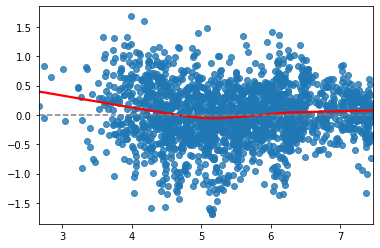

In [21]:
# 1. 모형의 선형성
# 예측값(fitted)와 잔차(residual)을 비교
# 빨간 실선은 잔차의 추세를 나타낸다
# 빨간 실선이 점선에서 크게 벗어나면 예측값에 따라 잔차가 크게 달라진것으로 선형성이 없다는 것
fitted= model3.predict(df_standard)
residual= df_standard['HS'] - fitted
sns.regplot(fitted, residual, lowess=True, line_kws={'color':'red'})
plt.plot([fitted.min(),fitted.max()], [0,0], '--', color='grey')


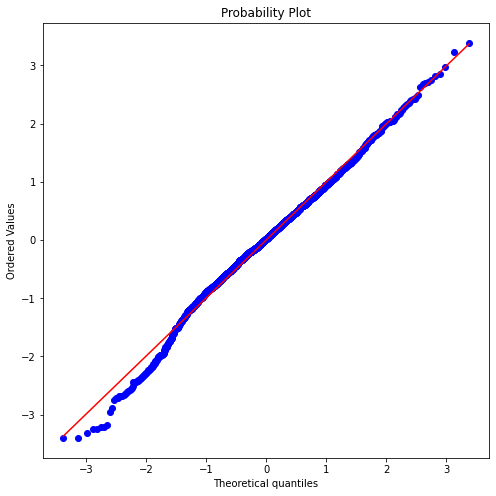

In [22]:
# 2. 잔차의 정규성
# 잔차가 정규분포를 따른다는 가정을 한다
# QQ Plot로 확인할 수 있다.
# 잔차가 정규분포를 띄면 QQ plot에서 점들이 점선을 따라 배치되어 있어야 한다
import scipy.stats
from scipy.stats import probplot 
sr = scipy.stats.zscore(residual)
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot()
probplot(sr, dist='norm',plot=ax) ## qq plot 출력
plt.show()

In [23]:
scipy.stats.shapiro(residual)

(0.993477463722229, 2.2001600541443622e-07)

C:\Users\CHA-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

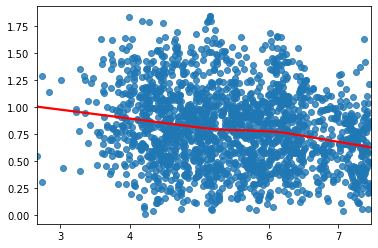

In [24]:
# 3. 잔차의 등분산성
# 희귀모형을 통해 예측된 값이 어떻든지, 모든 값들에 대하여 잔차의 분산이 동일하다는 가정
# 예측값(X축)에 따라 잔차가 어떻게 달라지는지 보여줌
# 빨간색 실선이 수평선에 가까울수록 등분산성이 있다는 것
import numpy as np
sns.regplot(fitted, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color':'red'})

# 3. continent 범주형으로 모델로 MinMaxScaler

In [25]:
# 싸이킷런 MinMaxScaler 으로 정규화
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler()
x= ndf[['log_gdp', 'social', 'life_exp', 'freedom','generosity', 'corruption', 
       'schooling', 'alcohol', 'suicide','obesity', 'birth', 'mental']]
scale2 = transformer.fit_transform(x)
scale2
df_minmax= pd.DataFrame(scale2)
df_minmax.columns = ['log_gdp', 'social', 'life_exp', 'freedom', 'generosity', 'corruption', 'schooling', 'alcohol',
                     'suicide','obesity', 'birth', 'mental']
# 정규화 안한 컬럼 df_scaler에 추가
df_minmax[['HS','year','country','continent']]= ndf[['HS','year','country','continent']]
df_minmax

,log_gdp,social,life_exp,freedom,generosity,corruption,schooling,alcohol,suicide,obesity,birth,mental,HS,year,country,continent
0,0.401356,0.809182,0.785714,0.741403,0.333011,0.715190,0.421875,0.269256,0.215085,0.507264,0.206485,0.530582,5.819,2018,Nicaragua,Nor.A
1,0.351486,0.566714,0.503571,0.579092,0.363020,0.910338,0.429688,0.075482,0.093262,0.184019,0.479963,0.179361,5.057,2012,Ghana,AF
2,0.245562,0.222382,0.397321,0.442916,0.313650,0.796414,0.117188,0.087591,0.065017,0.071025,0.691649,0.086241,3.330,2006,Benin,AF
3,0.559545,0.764706,0.774554,0.782669,0.415295,0.853376,0.750000,0.071034,0.525613,0.343019,0.176201,0.493112,4.331,2017,Sri Lanka,AS
4,0.315380,0.446198,0.680804,0.766162,0.258470,0.723629,0.304688,0.000365,0.134452,0.135190,0.163047,0.419619,4.633,2015,Bangladesh,AS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,0.559944,0.880918,0.750446,0.760660,0.253630,0.856540,0.484375,0.002508,0.169182,0.352300,0.138269,0.434382,6.464,2011,Colombia,SA
1877,0.379613,0.474892,0.587054,0.757909,0.299129,0.840717,0.375000,0.078060,0.306743,0.143261,0.195626,0.318333,4.424,2014,India,AS
1878,0.853980,0.949785,0.888393,0.958735,0.474347,0.154008,0.882812,0.319349,0.164167,0.270379,0.106455,0.515135,7.594,2017,Denmark,EU
1879,0.505087,0.846485,0.616071,0.792297,0.583737,0.648734,0.140625,0.056216,0.145703,0.211057,0.154940,0.447314,4.939,2014,Bhutan,AS


In [26]:
model4 = ols("HS~  continent+ log_gdp + social+ life_exp + freedom+ generosity+ corruption+ schooling+ alcohol+ suicide+ obesity+ birth+ mental", data=df_minmax).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HS   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     450.1
Date:                Sun, 15 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:11:29   Log-Likelihood:                -1352.7
No. Observations:                1881   AIC:                             2741.
Df Residuals:                    1863   BIC:                             2841.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.5449      0.175      8.850      0.000       1.203       1.887
continent[T.AS]        0.1678      0.046      3.662      0.000       0.078       0.258
continent[T.EU]        0.3484      0.063      5.562      0.000       0.226       0.471
continent[T.Nor.A]     0.7699      0.061     12.532      0.000       0.649       0.890
continent[T.OC]        0.5149      0.114      4.500      0.000       0.290       0.739
continent[T.SA]        0.7178      0.061     11.751      0.000       0.598       0.838
log_gdp                2.7442      0.142     19.341      0.000       2.466       3.022
social                 1.1398      0.106     10.731      0.000       0.932       1.348
life_exp               1.0882      0.203      5.361      0.000       0.690       1.486
freedom                0.6675      0.079      8.428      0.000       0.512       0.823
generosity             0.5916      0.090      6.580      0.000       0.415       0.768
corruption            -0.4208      0.078     -5.370      0.000      -0.574      -0.267
schooling              0.0252      0.098      0.258      0.797      -0.167       0.217
alcohol                0.4923      0.109      4.536      0.000       0.279       0.705
suicide               -0.4344      0.129     -3.380      0.001      -0.686      -0.182
obesity               -0.5536      0.091     -6.083      0.000      -0.732      -0.375
birth                  1.0637      0.133      8.023      0.000       0.804       1.324
mental                 0.3957      0.142      2.786      0.005       0.117       0.674
==============================================================================
Omnibus:                       28.661   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.925
Skew:                          -0.222   Prob(JB):                     2.61e-08
Kurtosis:                       3.499   Cond. No.                         49.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
from patsy import dmatrix, dmatrices
y, X = dmatrices('HS~ C(continent)+ log_gdp + social+ life_exp + freedom+ generosity+ corruption+ schooling+ alcohol+ suicide+ obesity+ birth+ mental', df_minmax, return_type = 'dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,230.152811,Intercept
1,3.344352,C(continent)[T.AS]
2,5.935128,C(continent)[T.EU]
3,2.330811,C(continent)[T.Nor.A]
4,1.449380,C(continent)[T.OC]
5,2.030056,C(continent)[T.SA]
6,7.940896,log_gdp
7,2.453185,social
8,8.540061,life_exp
9,1.795310,freedom


C:\Users\CHA-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


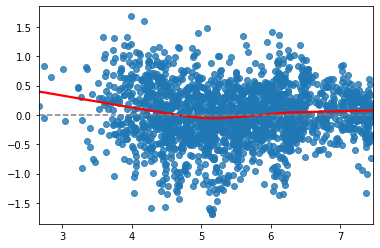

In [28]:
# 1. 모형의 선형성
# 예측값(fitted)와 잔차(residual)을 비교
# 빨간 실선은 잔차의 추세를 나타낸다
# 빨간 실선이 점선에서 크게 벗어나면 예측값에 따라 잔차가 크게 달라진것으로 선형성이 없다는 것
fitted= model4.predict(df_minmax)
residual= df_minmax['HS'] - fitted
sns.regplot(fitted, residual, lowess=True, line_kws={'color':'red'})
plt.plot([fitted.min(),fitted.max()], [0,0], '--', color='grey')


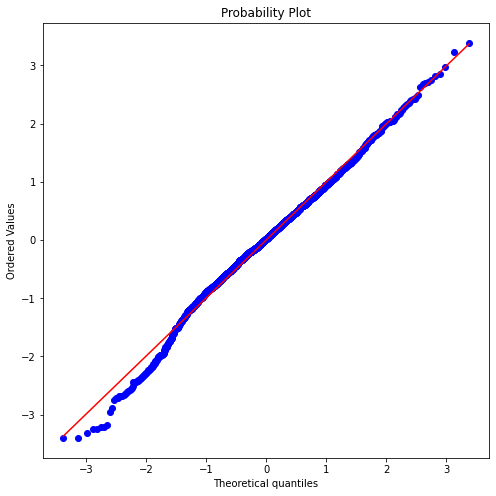

In [29]:
# 2. 잔차의 정규성
# 잔차가 정규분포를 따른다는 가정을 한다
# QQ Plot로 확인할 수 있다.
# 잔차가 정규분포를 띄면 QQ plot에서 점들이 점선을 따라 배치되어 있어야 한다
import scipy.stats
from scipy.stats import probplot 
sr = scipy.stats.zscore(residual)
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot()
probplot(sr, dist='norm',plot=ax) ## qq plot 출력
plt.show()

In [30]:
scipy.stats.shapiro(residual)

(0.993477463722229, 2.2001600541443622e-07)

C:\Users\CHA-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

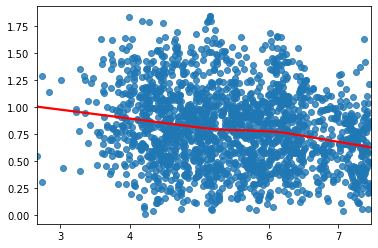

In [31]:
# 3. 잔차의 등분산성
# 희귀모형을 통해 예측된 값이 어떻든지, 모든 값들에 대하여 잔차의 분산이 동일하다는 가정
# 예측값(X축)에 따라 잔차가 어떻게 달라지는지 보여줌
# 빨간색 실선이 수평선에 가까울수록 등분산성이 있다는 것
import numpy as np
sns.regplot(fitted, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color':'red'})

# 4. Schooling 컬럼 제거시

In [32]:
# 변수선택법에서 forward 제외하고 backward, stepwise selection 방식은 schooling 제거하라고 나옴
# 제거시 모델 확인!
model5 = ols("HS~  continent+ log_gdp + social+ life_exp + freedom+ generosity+ corruption+ alcohol+ suicide+ obesity+ birth+ mental", data=df_minmax).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HS   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     478.4
Date:                Sun, 15 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:11:42   Log-Likelihood:                -1352.7
No. Observations:                1881   AIC:                             2739.
Df Residuals:                    1864   BIC:                             2834.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.5427      0.174      8.850      0.000       1.201       1.885
continent[T.AS]        0.1688      0.046      3.701      0.000       0.079       0.258
continent[T.EU]        0.3503      0.062      5.629      0.000       0.228       0.472
continent[T.Nor.A]     0.7693      0.061     12.535      0.000       0.649       0.890
continent[T.OC]        0.5191      0.113      4.587      0.000       0.297       0.741
continent[T.SA]        0.7181      0.061     11.761      0.000       0.598       0.838
log_gdp                2.7566      0.133     20.654      0.000       2.495       3.018
social                 1.1427      0.106     10.820      0.000       0.936       1.350
life_exp               1.1019      0.196      5.623      0.000       0.718       1.486
freedom                0.6680      0.079      8.439      0.000       0.513       0.823
generosity             0.5923      0.090      6.593      0.000       0.416       0.768
corruption            -0.4224      0.078     -5.410      0.000      -0.576      -0.269
alcohol                0.4936      0.108      4.556      0.000       0.281       0.706
suicide               -0.4308      0.128     -3.372      0.001      -0.681      -0.180
obesity               -0.5480      0.088     -6.202      0.000      -0.721      -0.375
birth                  1.0625      0.132      8.021      0.000       0.803       1.322
mental                 0.3843      0.135      2.847      0.004       0.120       0.649
==============================================================================
Omnibus:                       28.628   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.826
Skew:                          -0.222   Prob(JB):                     2.74e-08
Kurtosis:                       3.497   Cond. No.                         46.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
from patsy import dmatrix, dmatrices
y, X = dmatrices('HS~ C(continent)+ log_gdp + social+ life_exp + freedom+ generosity+ corruption+ alcohol+ suicide+ obesity+ birth+ mental', df_minmax, return_type = 'dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,229.588382,Intercept
1,3.317140,C(continent)[T.AS]
2,5.859425,C(continent)[T.EU]
3,2.327118,C(continent)[T.Nor.A]
4,1.419027,C(continent)[T.OC]
5,2.029305,C(continent)[T.SA]
6,7.029978,log_gdp
7,2.426550,social
8,7.961296,life_exp
9,1.794356,freedom
